# Metadata

```yaml
Course:    DS 5001
Module:    11 Lab
Topic:     Running the Syuzhet Package in R
Author:    R.C. Alvarado
Date:      12 April 2023 (revised)
```

**Notes**

- Uses Jockers' [Syuzhet module](https://cran.r-project.org/web/packages/syuzhet/vignettes/syuzhet-vignette.html) in R.
- To use R in Jupyter, see [How to Create an R Kernel on Jupyter Lab](M11_00_Rkernel.pdf).

# Set Up

First, make sure you have these R packages installed:

- syuzhet
- dplyr
- ini

You can install these using Conda from within your R environment:

```bash
conda install -c r r-syuzhet r-dplyr r-ini
```

## Configuration

In [1]:
env_file = "../../../env.ini"

library(ini)

cfg <- read.ini(env_file) 

# We do the following because R's ini package doesn't understand Python's ini interpolation scheme :-(
data_home <- sub('%\\(base_path\\)s', cfg$DEFAULT$base_path, cfg$DEFAULT$data_home) 

In [2]:
data_home

[1] "/home/rca2t/Documents/MSDS/DS5001/data"

In [3]:
# methods <- c("syuzhet", "afinn", "bing", "nrc", "stanford")
method <- 'nrc'
fft_low_pass <- 3
dct_low_pass <- 6

## Libraries

In [4]:
library(syuzhet)
library(repr)

In [5]:
options(repr.plot.width=15, repr.plot.height=6)

# Define Main Function

In [6]:
get_sentence_v_from_book_file <- function(book_file) {
    book <- get_text_as_string(book_file)
    book.sv <- get_sentences(book)
    return(book.sv)
}

In [7]:
plotitall <- function (book.sv, book_title) {
    
    # Compute sentiment
    book.sentiment_vector <- get_sentiment(book.sv, method=method)
    
    # Plot the raw signal
    plot(book.sentiment_vector, 
         type ="l", 
         main = book_title,
         xlab = "Narrative Time", 
         ylab = "Emotional Valence")
    
    # Get smoothed signal the old way
    book.ft_values <- get_transformed_values(book.sentiment_vector, 
                                     low_pass_size = fft_low_pass, 
                                     x_reverse_len = 100,
                                     scale_vals = TRUE, 
                                     scale_range = FALSE)
    
    # Get smoothing signal the new way
    book.dct_values <- get_dct_transform(book.sentiment_vector, 
                                         scale_vals = TRUE, 
                                         scale_range = FALSE)
    
    # Plot the old 
    plot(book.ft_values,
         type ="h", 
         main = paste(book_title, " transformed (FFT)"), 
         xlab = "narrative time", 
         ylab = "Emotional Valence", col = "red")
    
    # Plot the new
    plot(book.dct_values,
         type ="h", 
         main = paste(book_title, " transformed (DCT)"), 
         xlab = "narrative time", 
         ylab = "Emotional Valence", col = "red")
    
}

# Explore Syuzhet Texts

## Persuasion

In [8]:
persuasion <- get_sentence_v_from_book_file(paste(data_home, '/syuzhet/R/persuasion.txt', sep = ''))

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


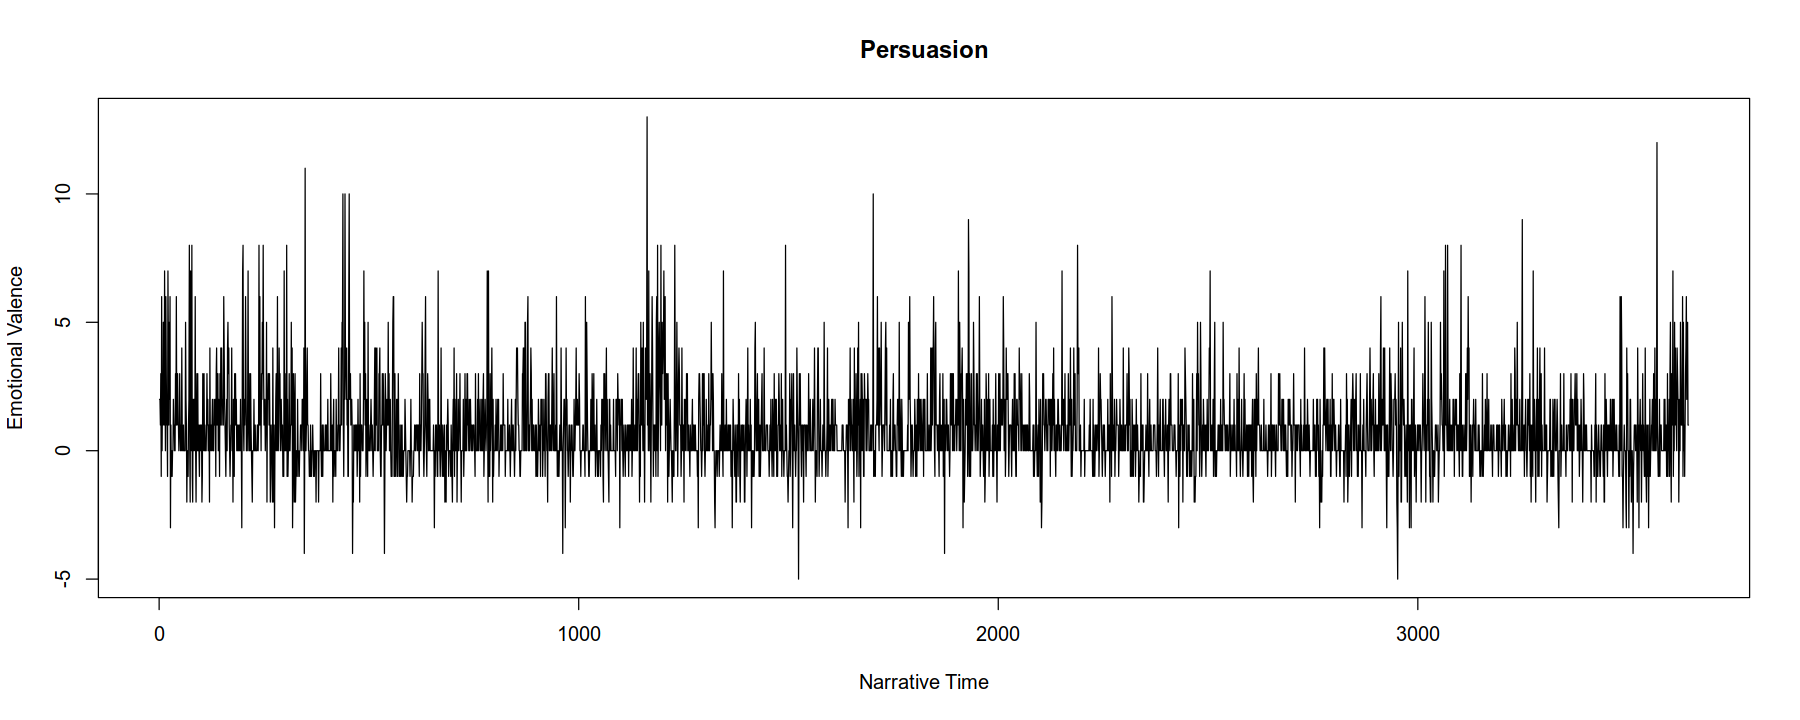

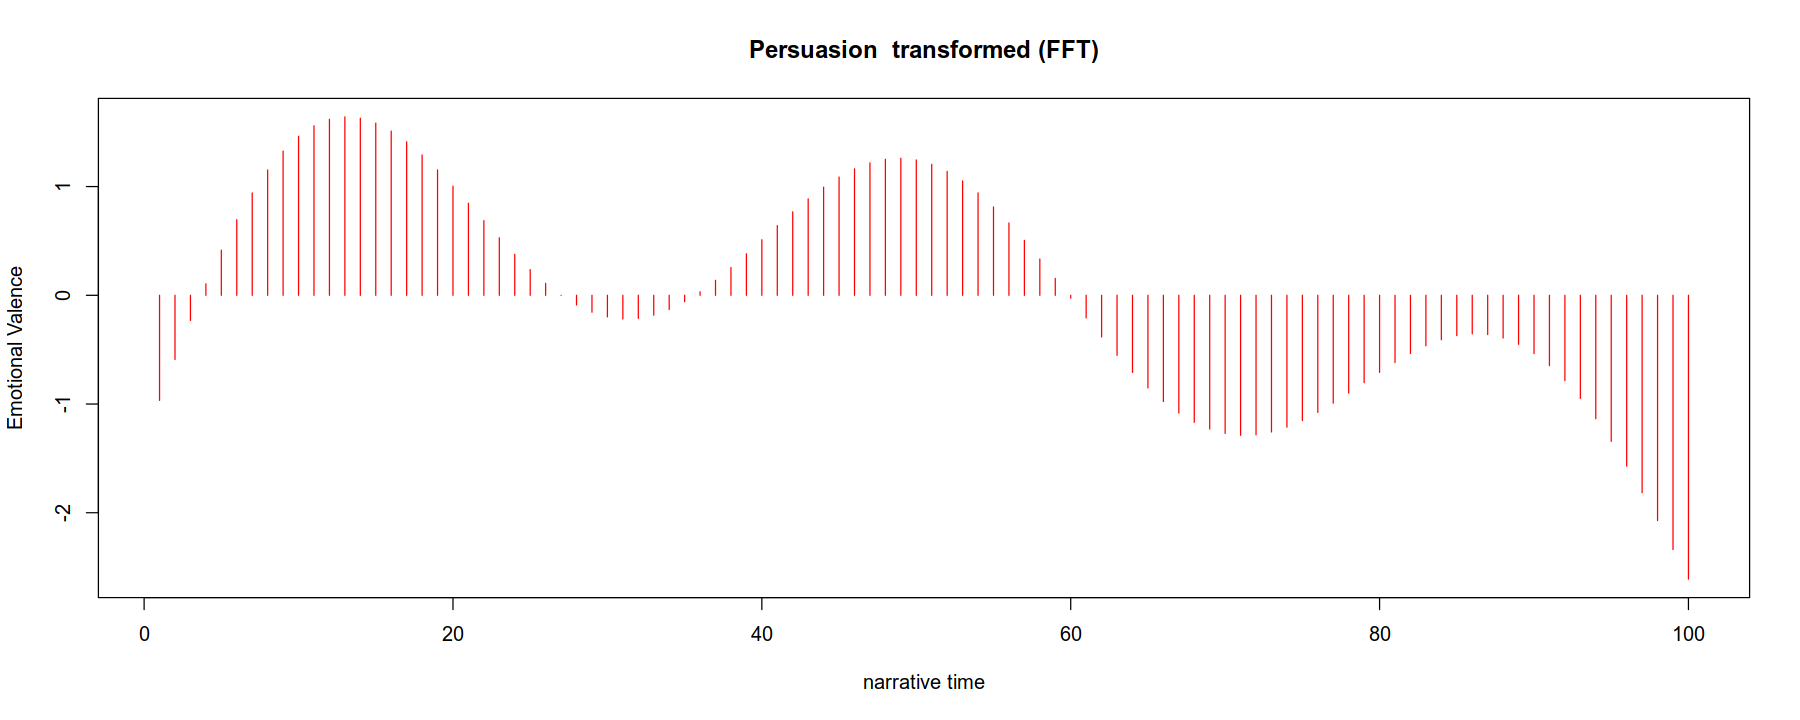

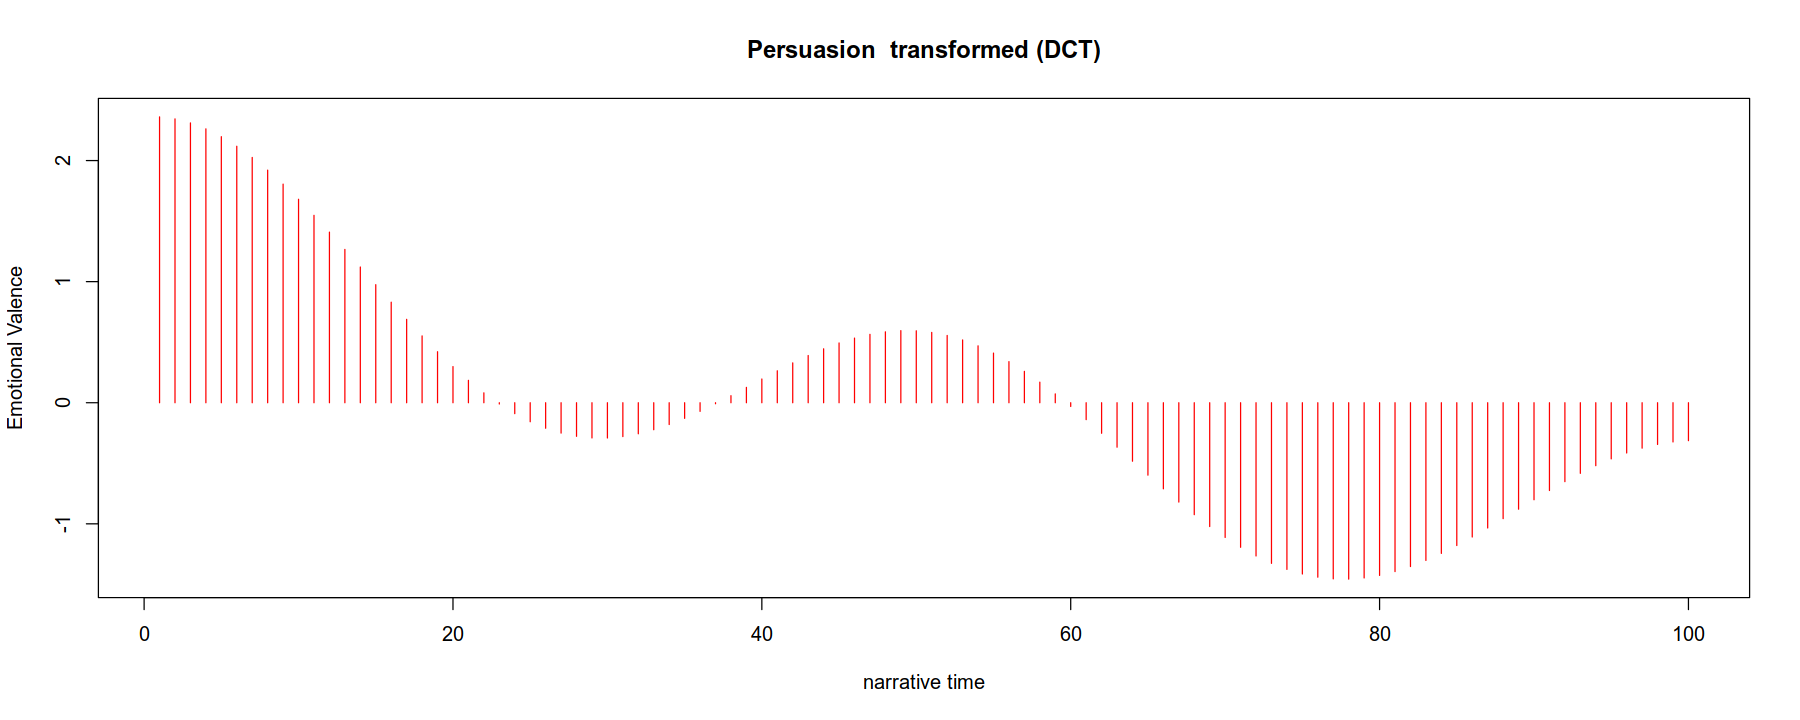

In [9]:
plotitall(persuasion, 'Persuasion')

## Moby Dick

In [10]:
moby <- get_sentence_v_from_book_file(paste(data_home, '/syuzhet/R/moby.txt', sep = ''))

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


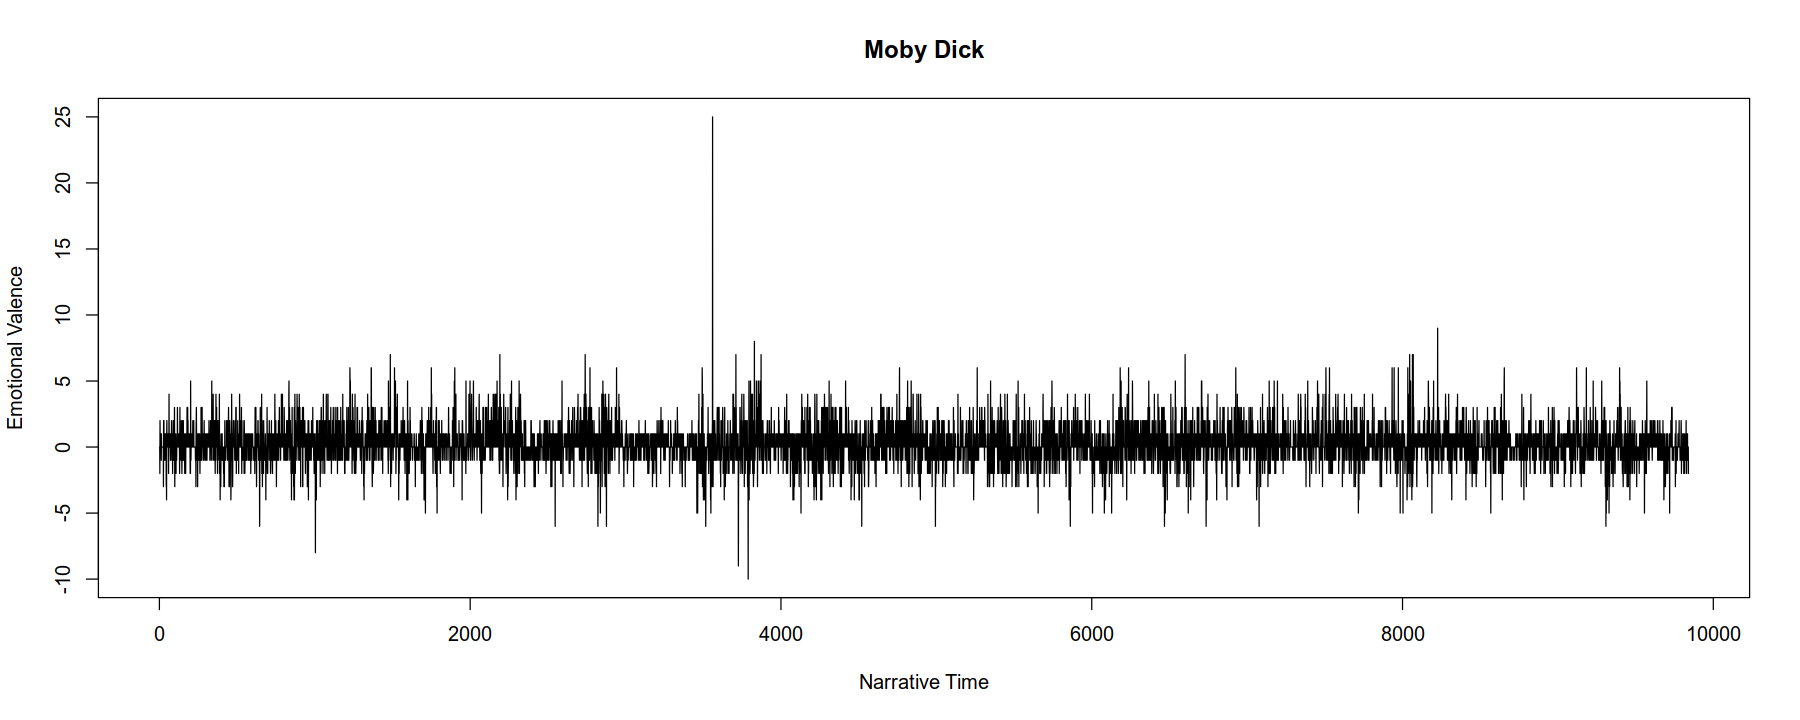

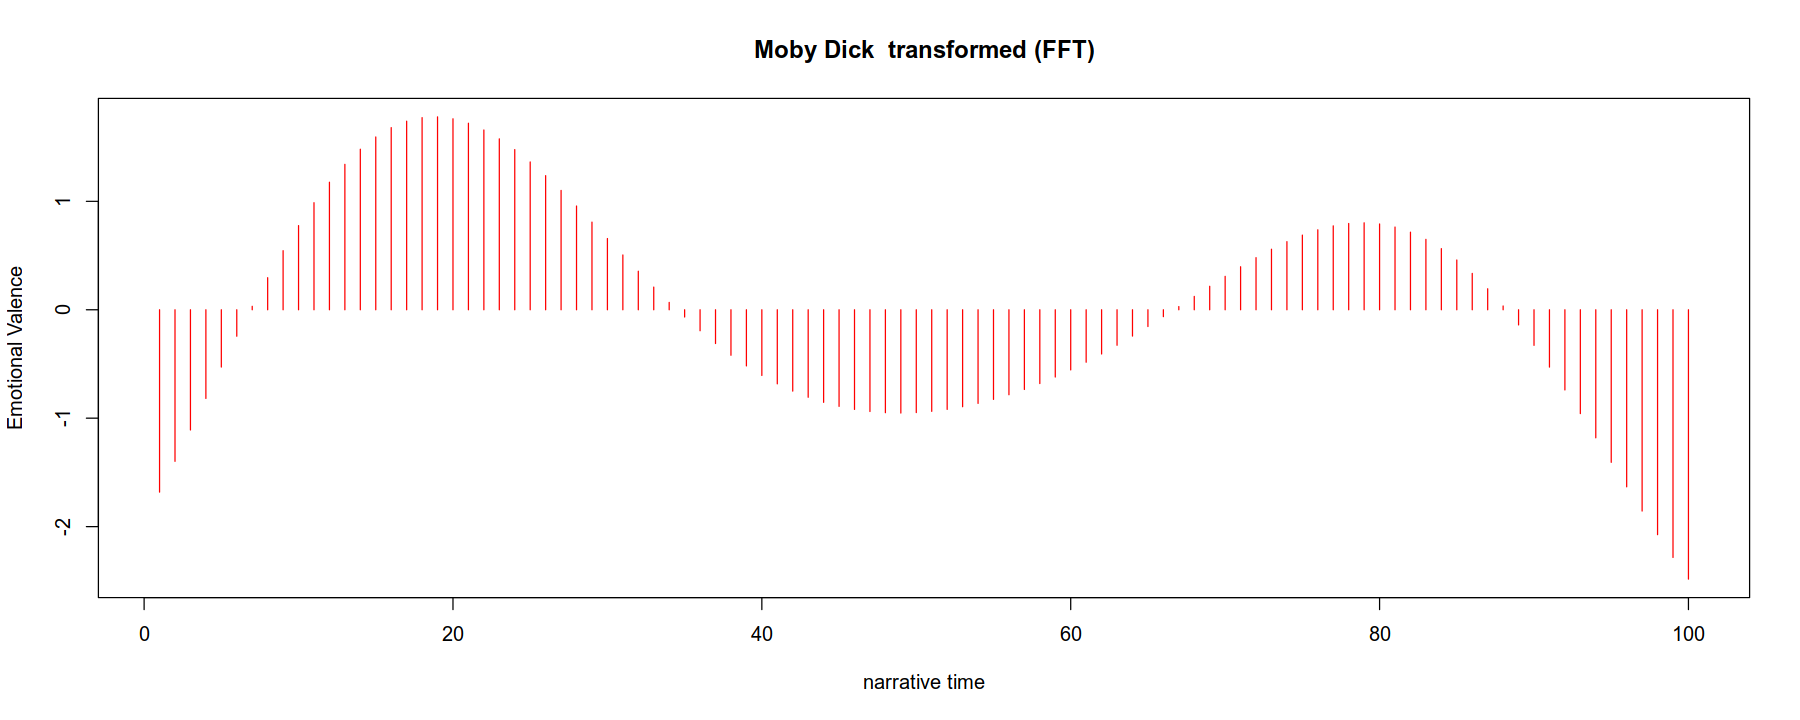

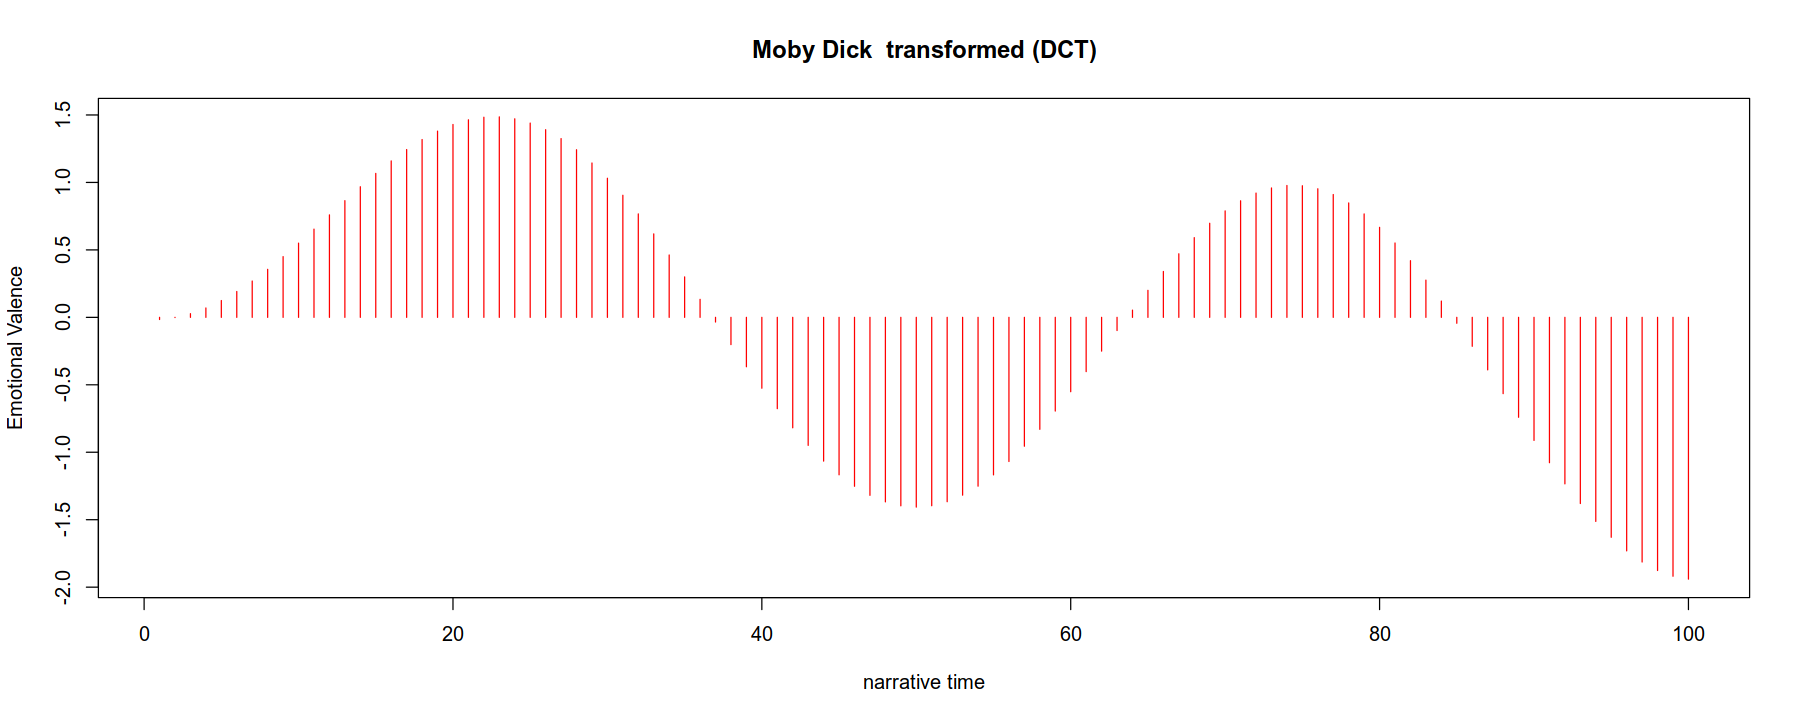

In [11]:
plotitall(moby, 'Moby Dick')

## Frankenstein

In [12]:
frankenstein <- get_sentence_v_from_book_file(paste(data_home, '/syuzhet/R/frankenstein.txt', sep = ''))

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


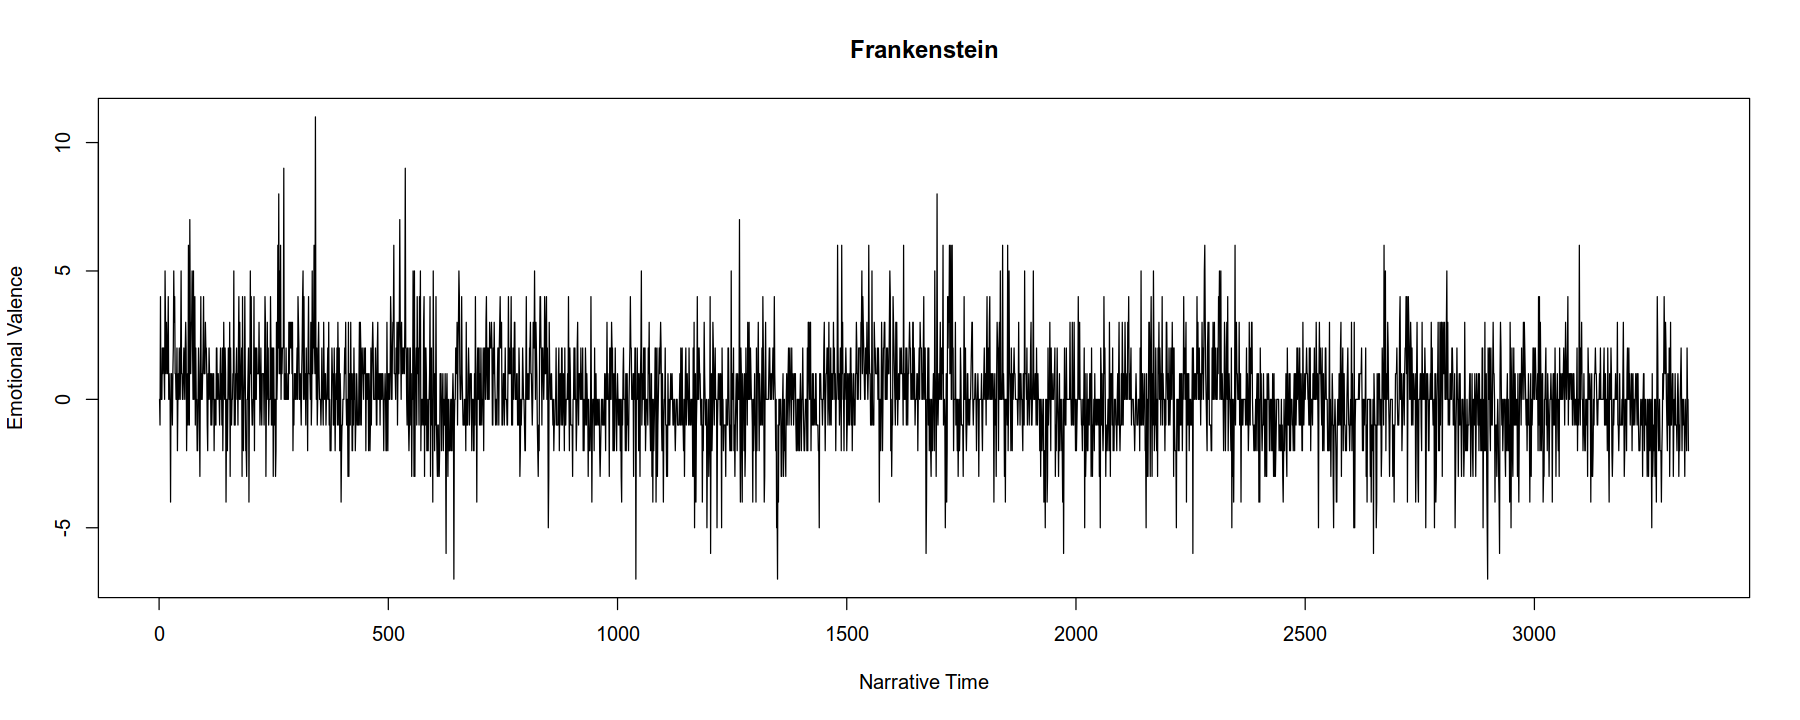

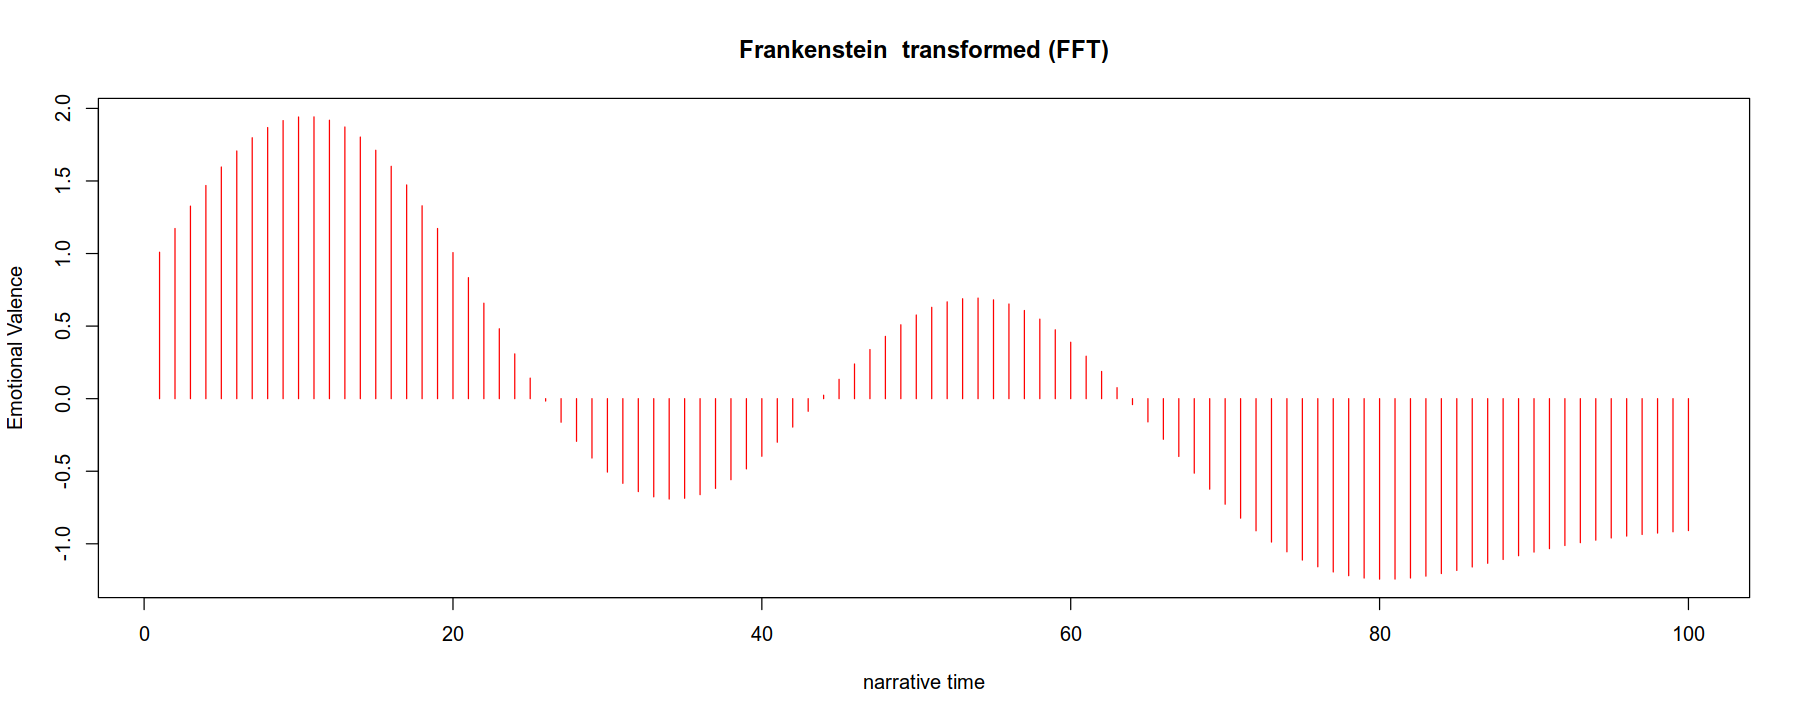

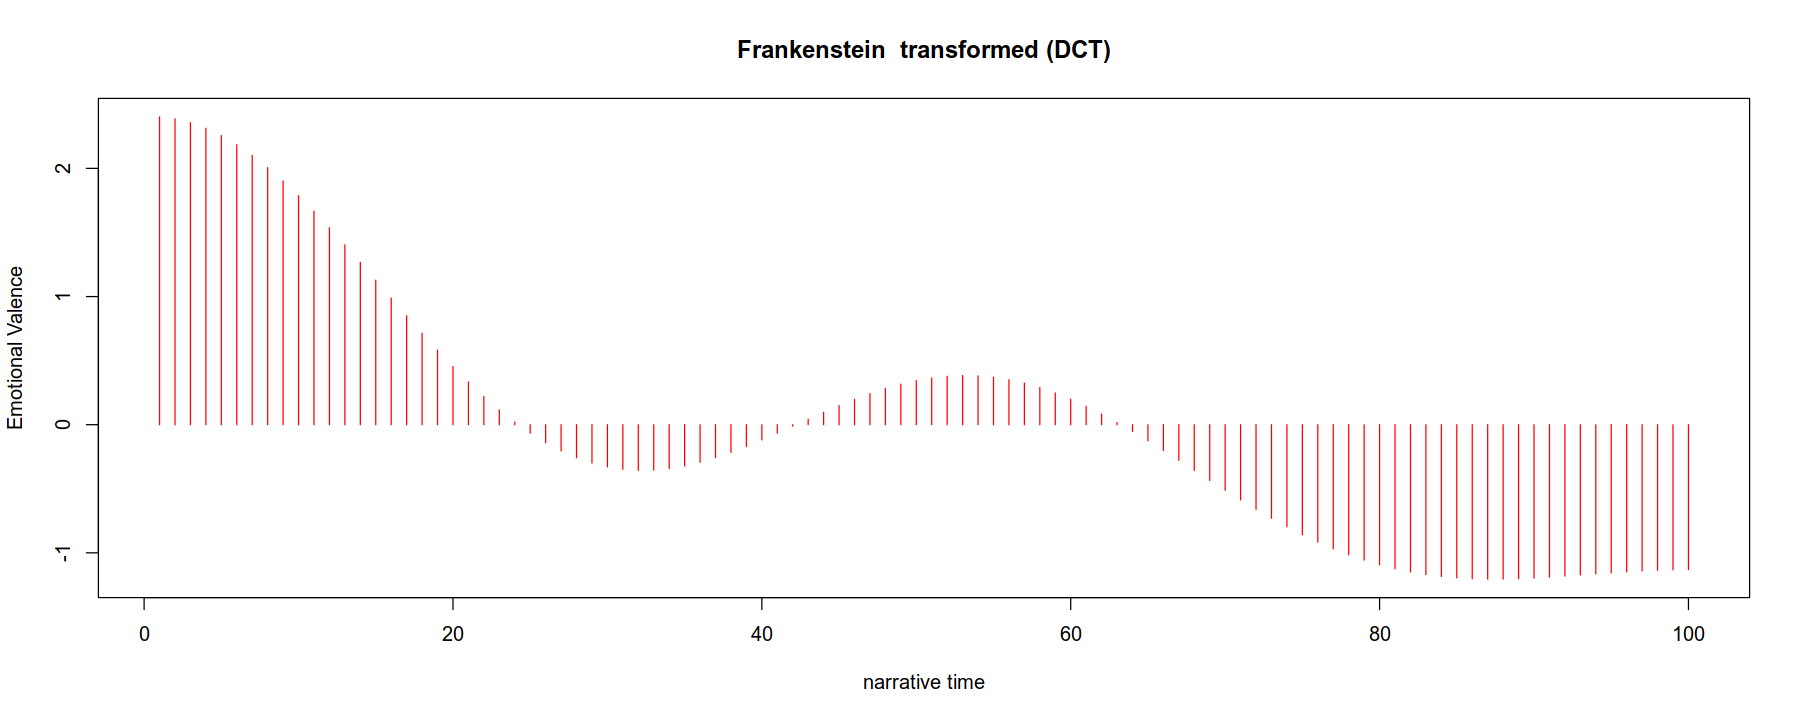

In [13]:
plotitall(frankenstein, "Frankenstein")

## Dracula

In [14]:
dracula <- get_sentence_v_from_book_file(paste(data_home, '/syuzhet/R/dracula.txt', sep = ''))

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


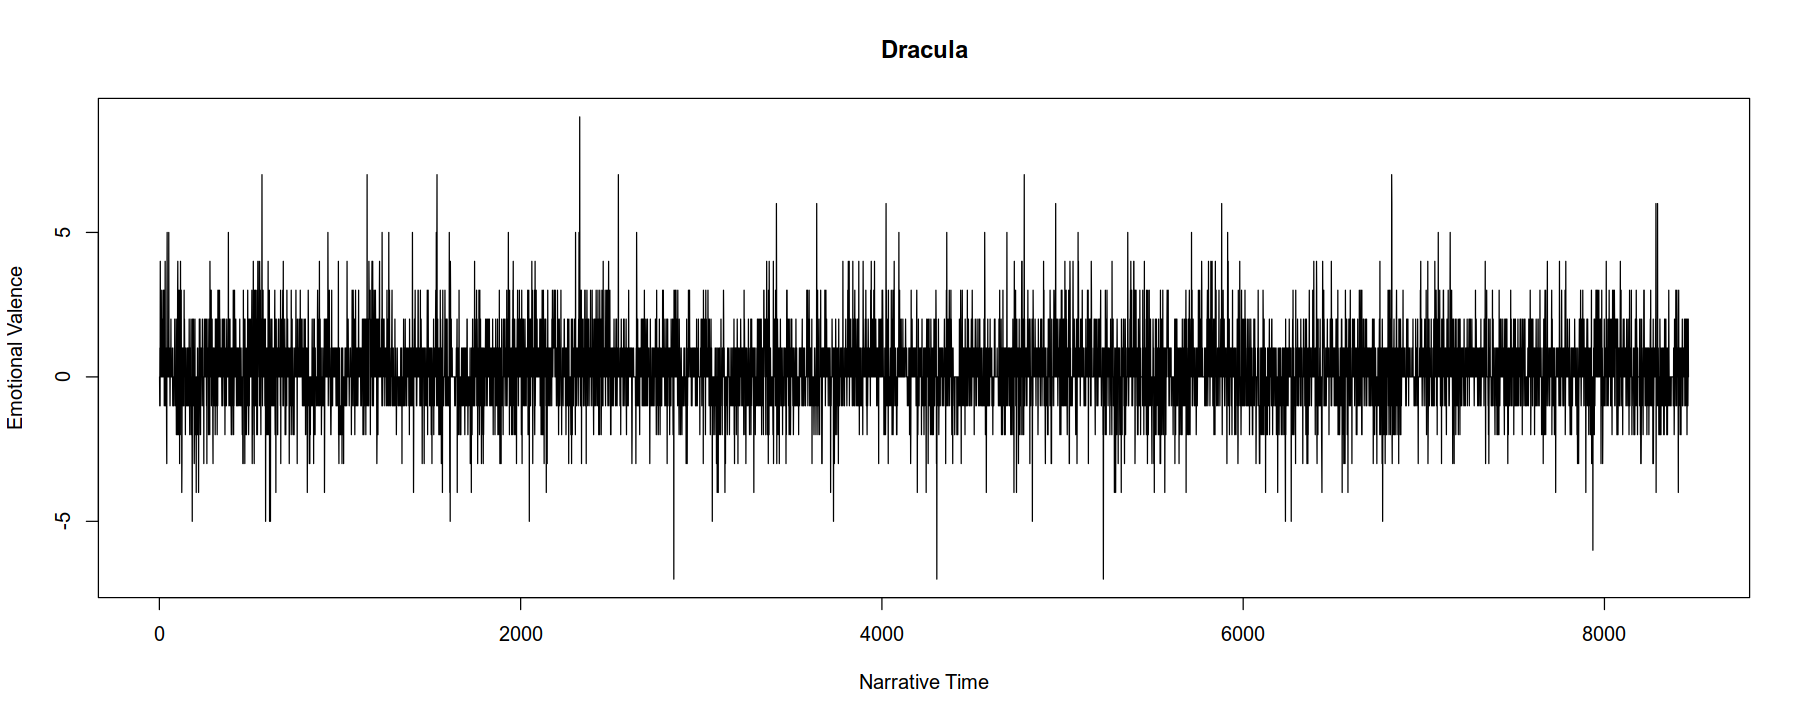

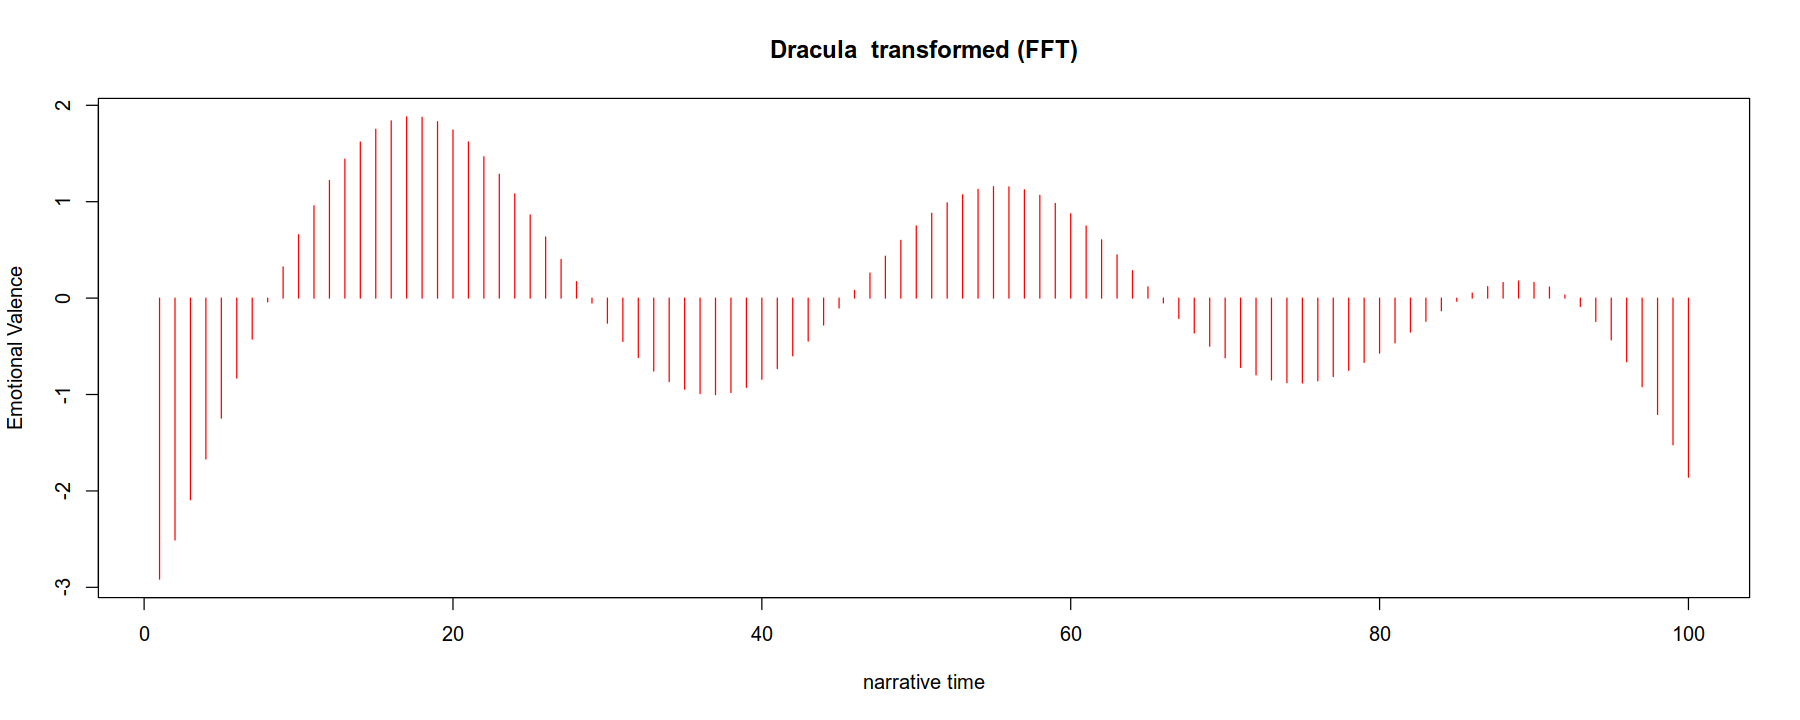

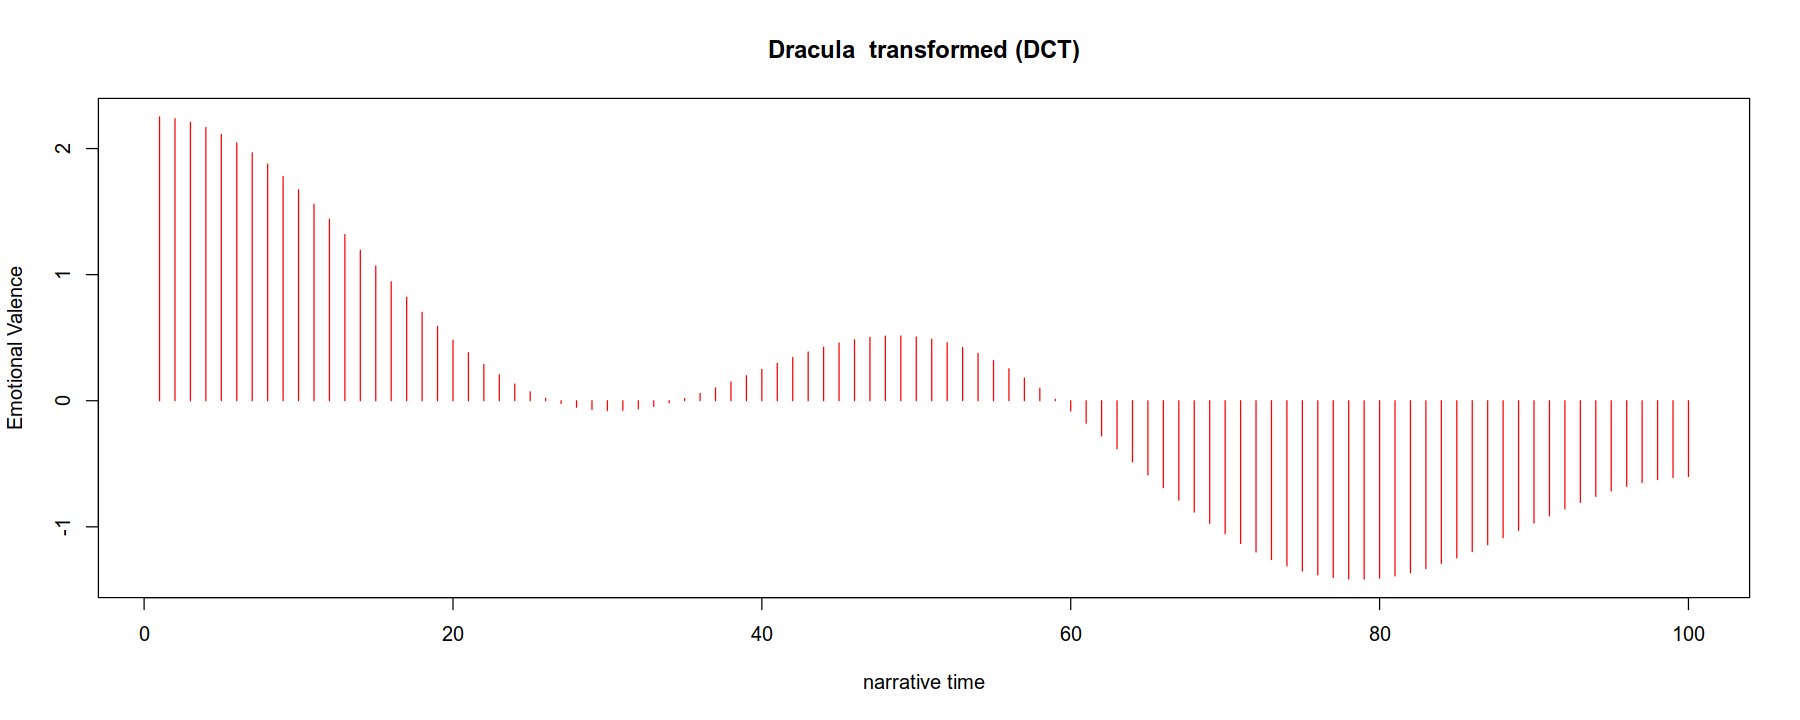

In [15]:
plotitall(dracula, 'Dracula')

## Great Expectations

In [16]:
greatexpectations <- get_sentence_v_from_book_file(paste(data_home, '/syuzhet/R/greatexpectations.txt', sep = ''))

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


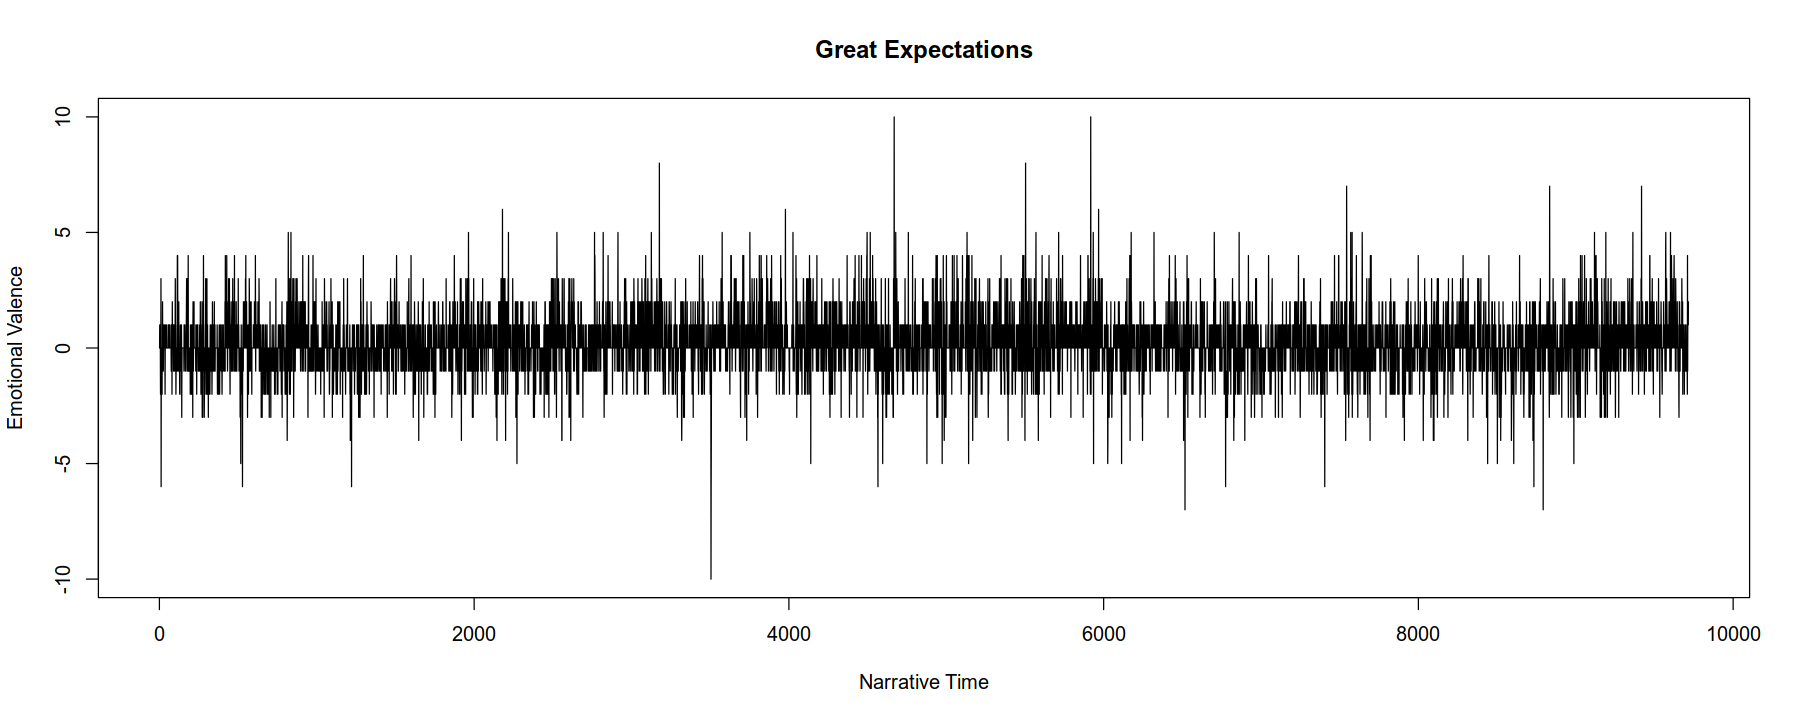

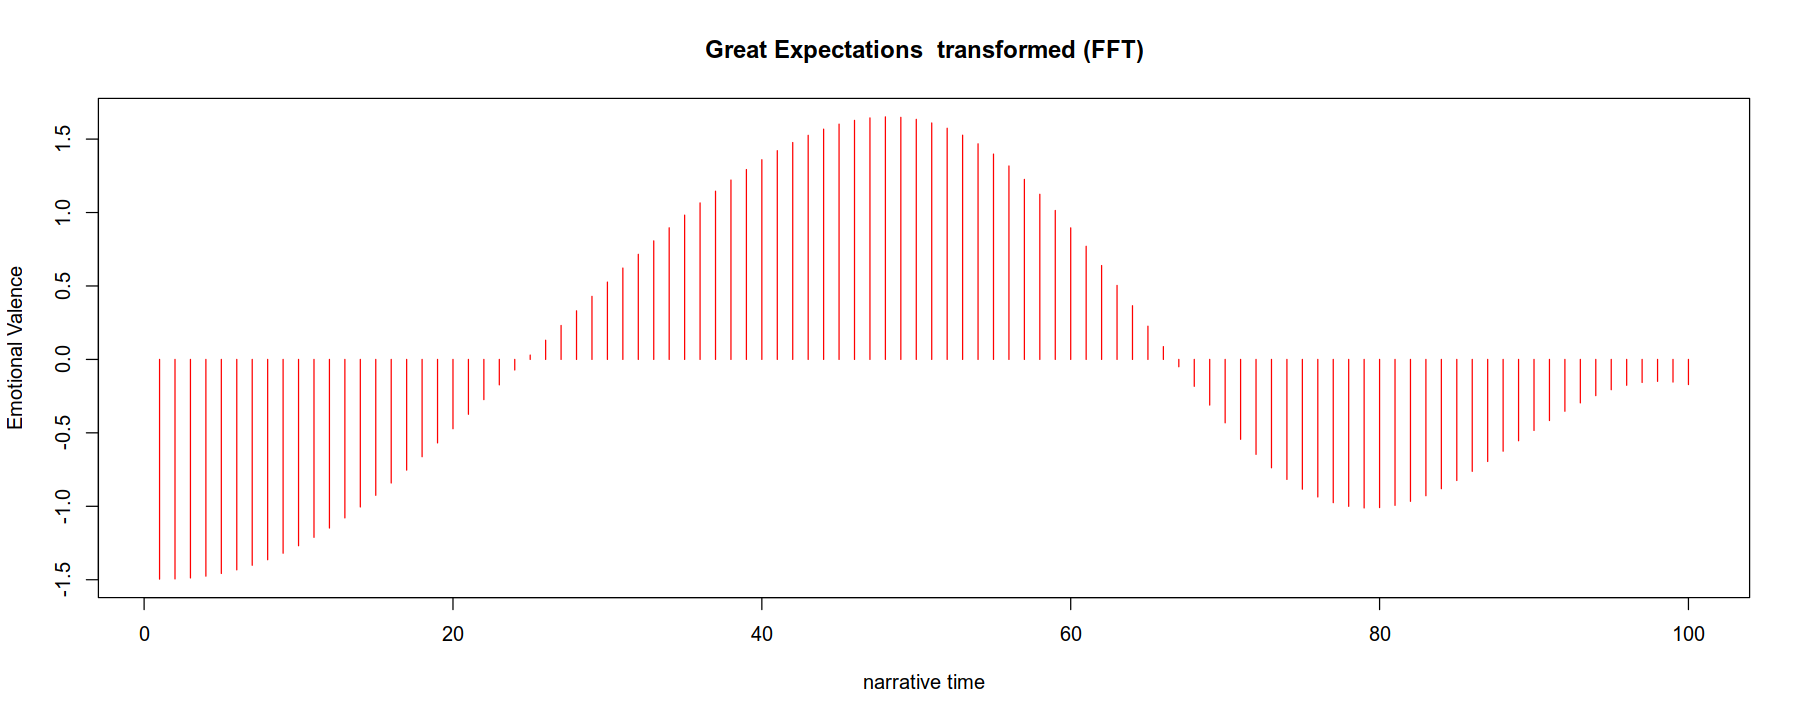

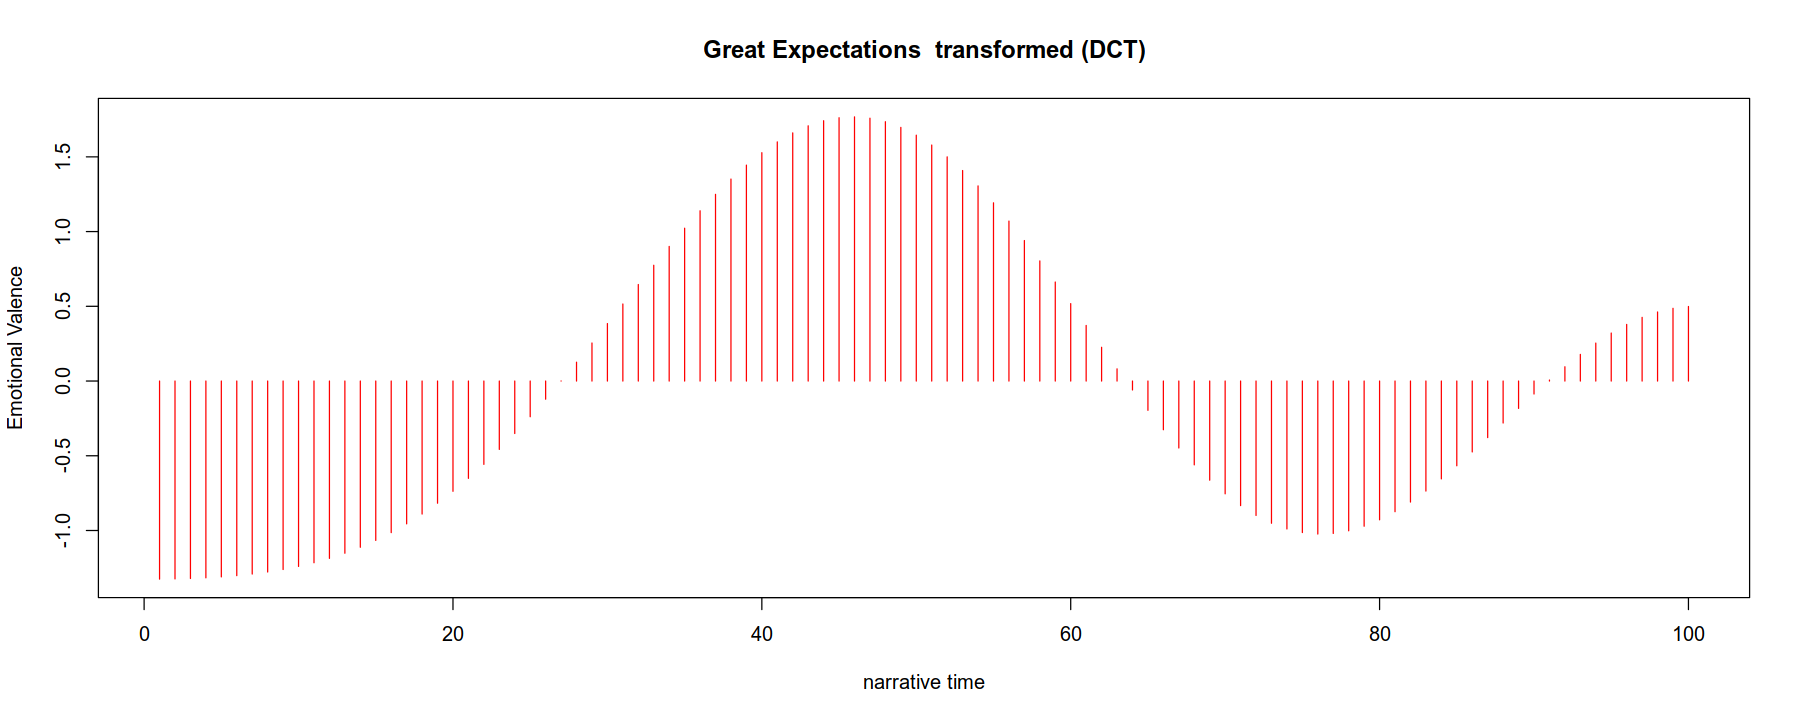

In [17]:
plotitall(greatexpectations, 'Great Expectations')

# Explore Our Texts

In [18]:
CORPUS <- read.csv(paste(data_home, "/syuzhet/combo-SENTENCES.csv", sep = ''))

Define function to get the sentences for a given text.

In [19]:
get_sentence_v_from_corpus_df <- function(corpus_df, book_id) {
    return(corpus_df[corpus_df$book_id == book_id, 'sent_str'])
}

In [20]:
persuasion2 <- get_sentence_v_from_corpus_df(CORPUS, '105')

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


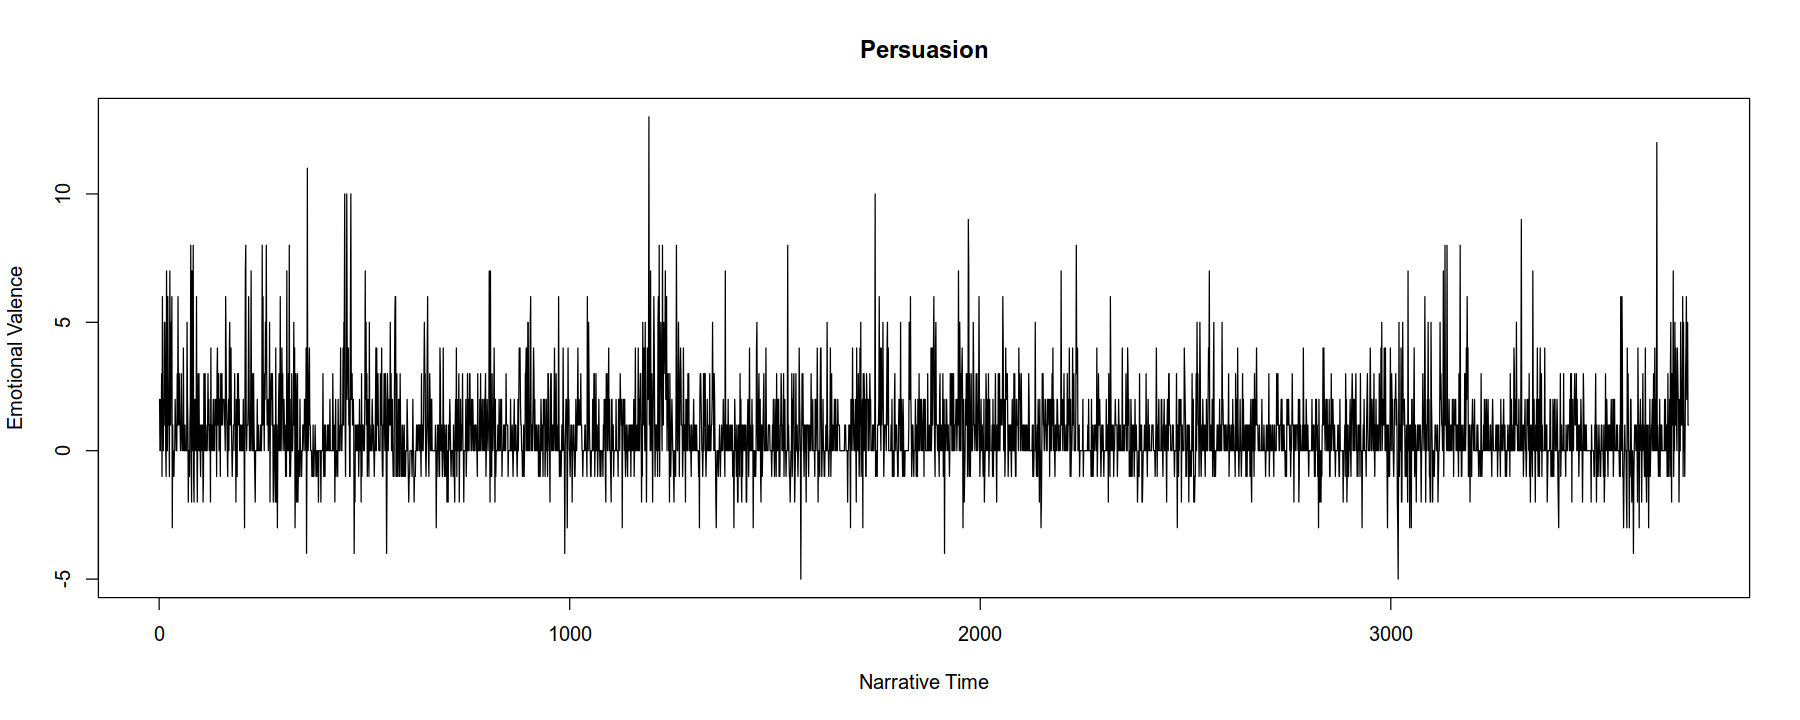

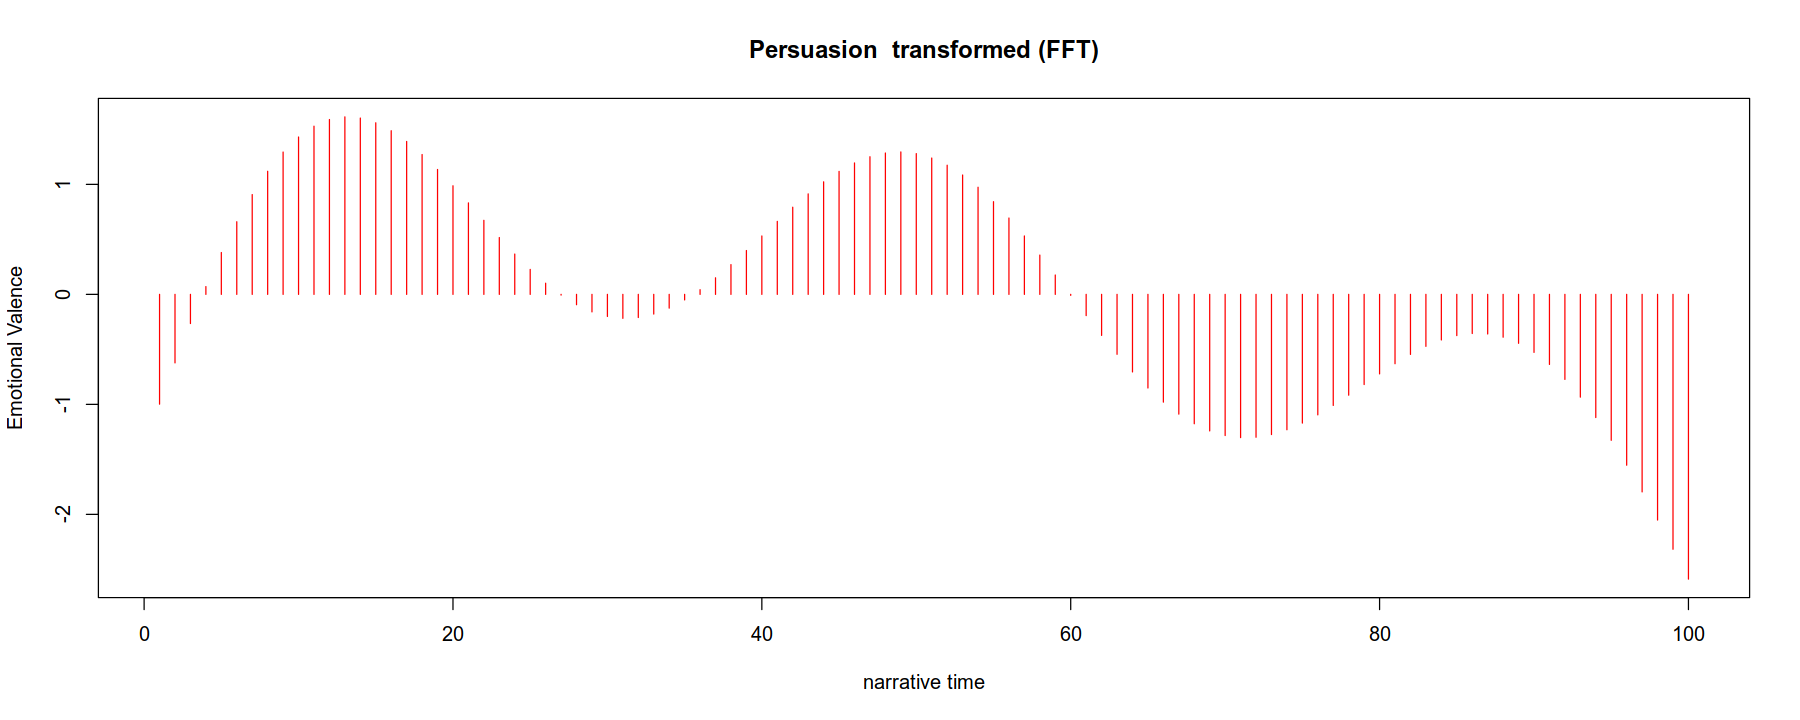

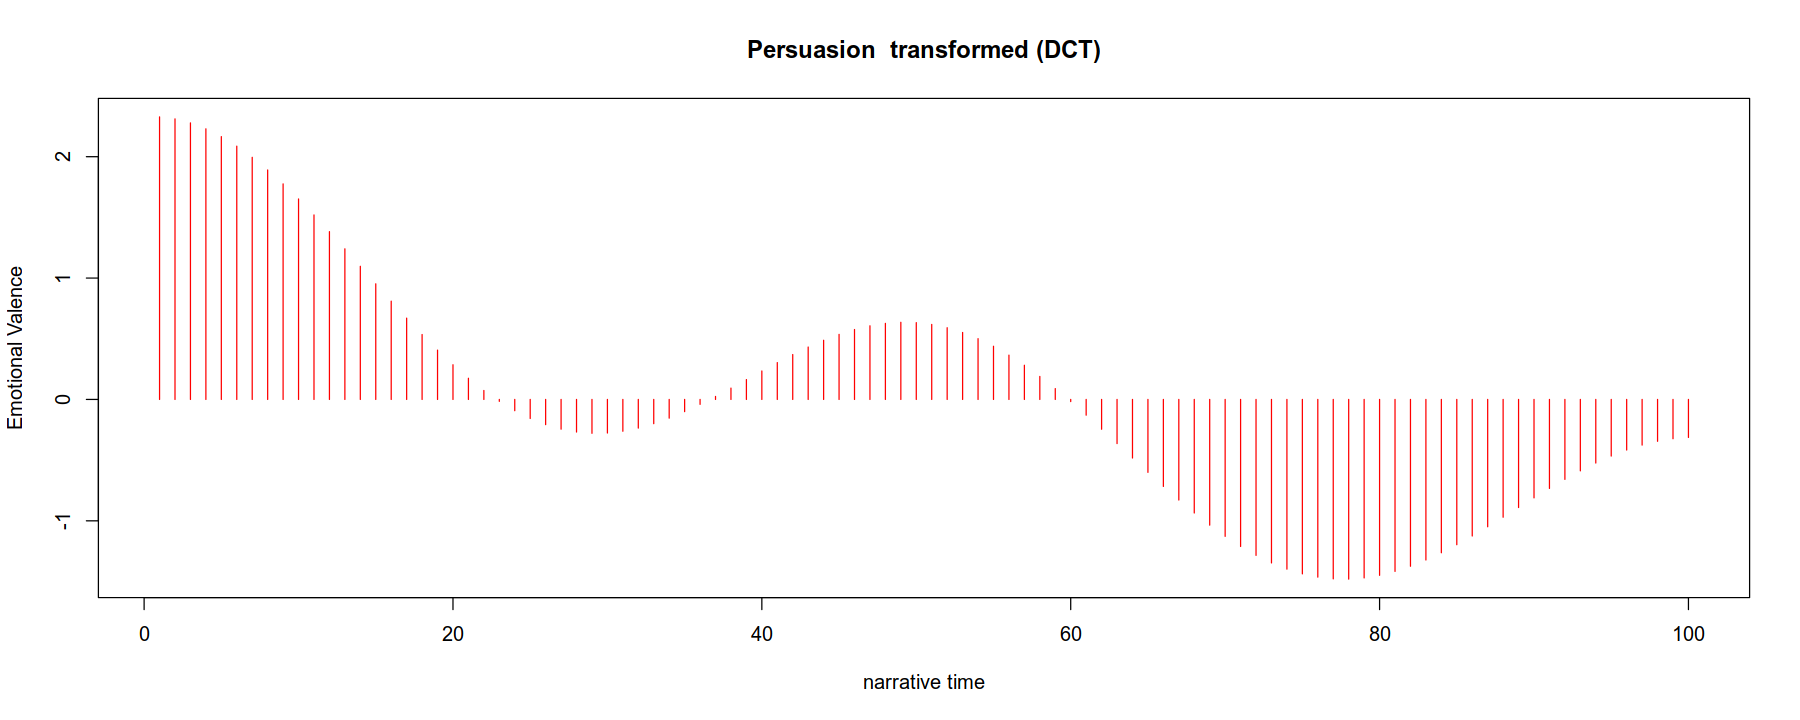

In [21]:
plotitall(persuasion2, 'Persuasion')

In [22]:
pride <- get_sentence_v_from_corpus_df(CORPUS, '1342')

Warning message in get_transformed_values(book.sentiment_vector, low_pass_size = fft_low_pass, :
“This function is maintained for legacy purposes.  Consider using get_dct_transform() instead.”


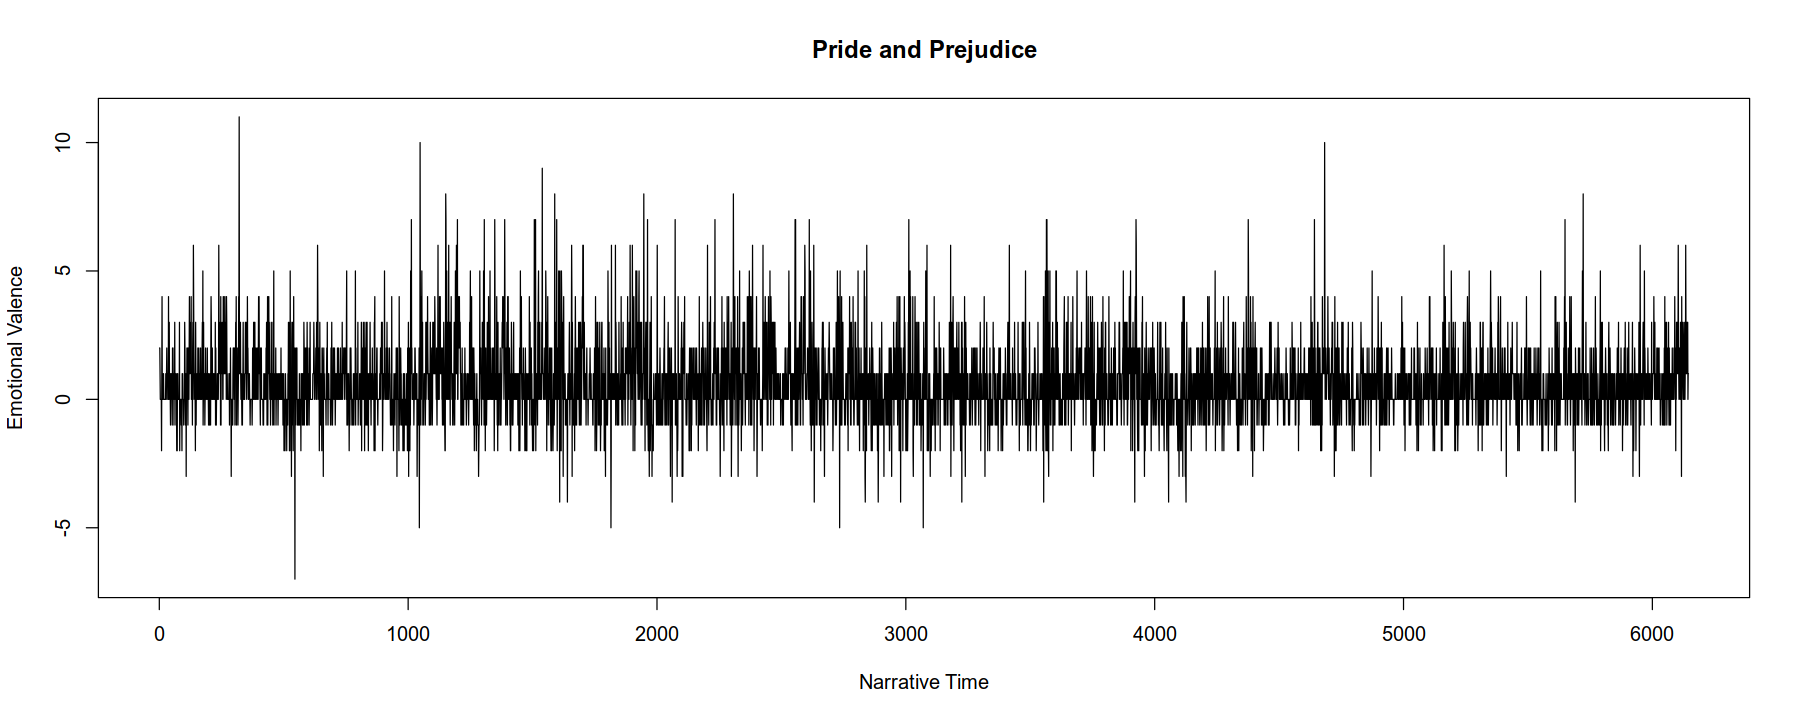

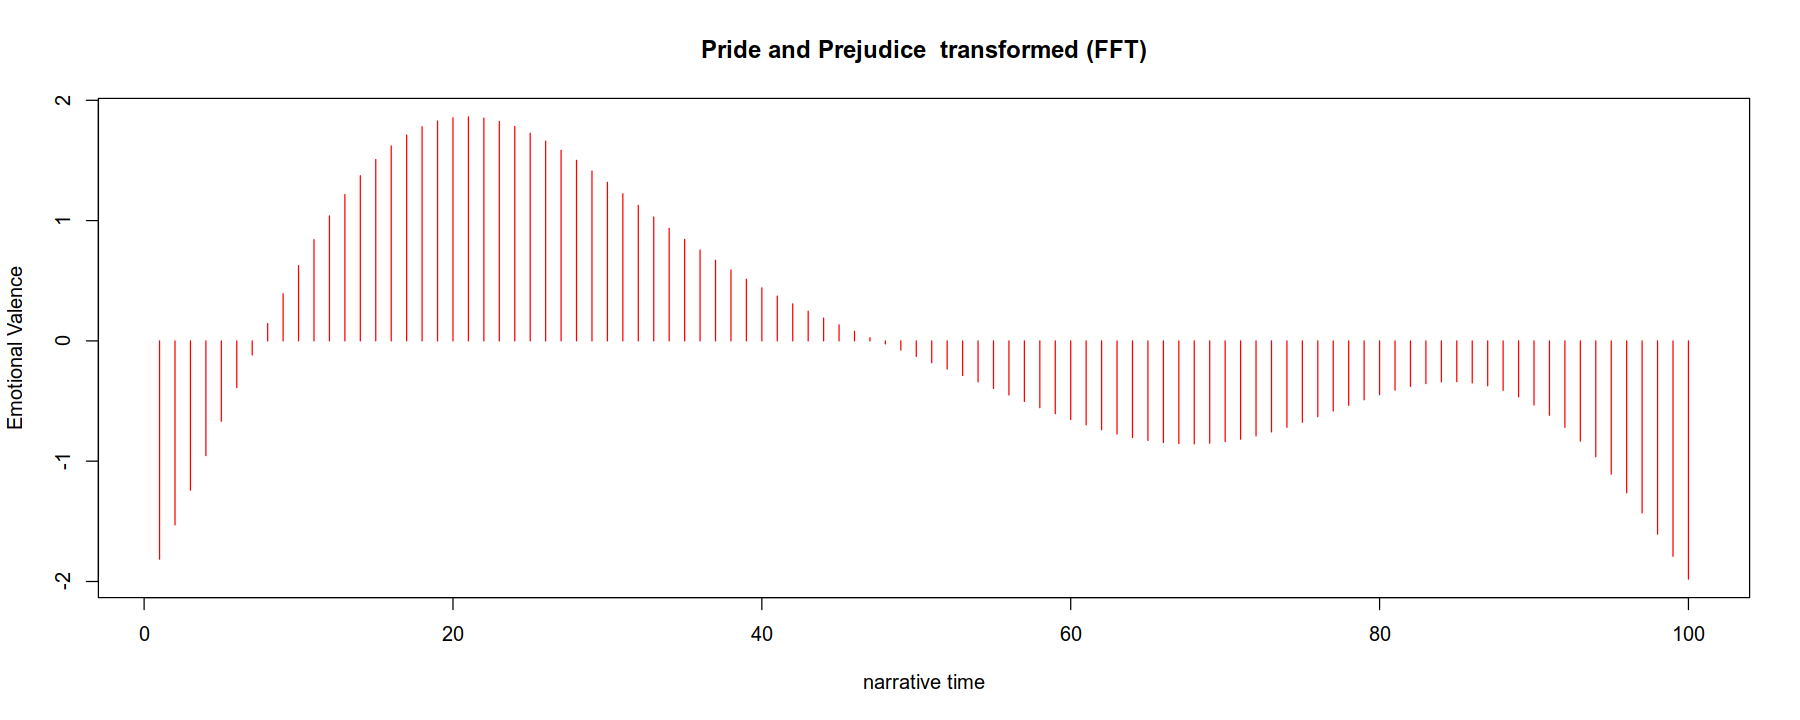

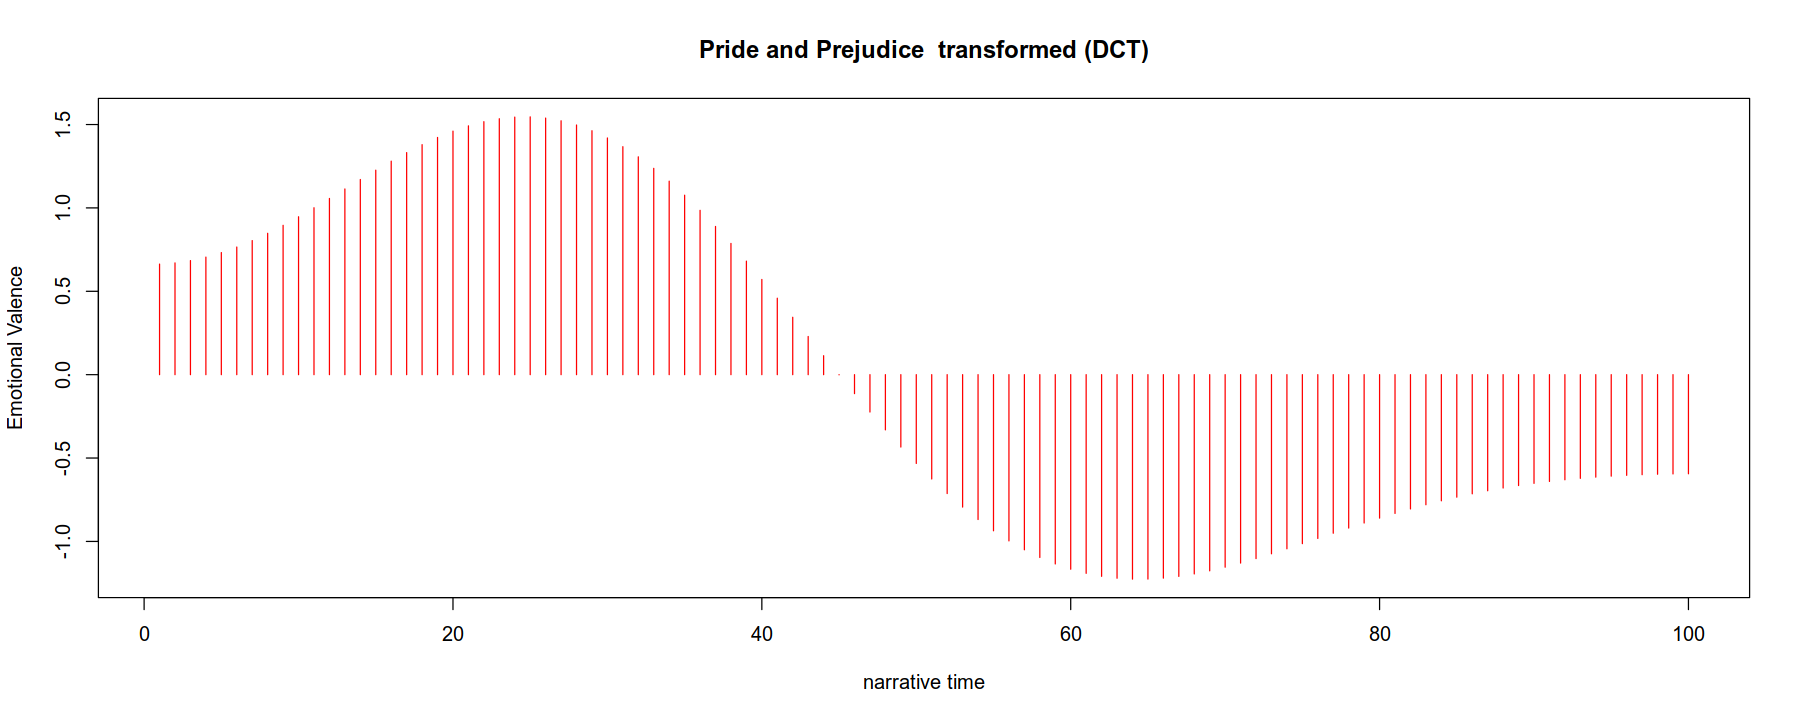

In [23]:
plotitall(pride, 'Pride and Prejudice')